In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


In [120]:
data=pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [122]:
## total_bedrooms 207 missing values 
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


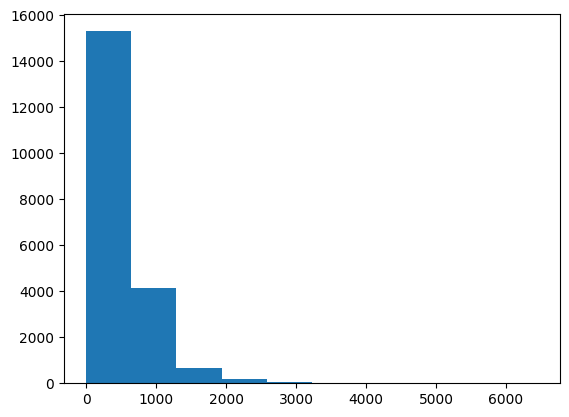

In [123]:
plt.hist(data['total_bedrooms'])
plt.show()

In [124]:
## The histogram above shows that total_bedrooms is skewed hence we will
##replace the missing values by the median.

data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())



In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [126]:
##Explore the variable ocean_proximity

data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [127]:
## Drop the variable ocean_proximity
data.drop(['ocean_proximity'], axis=1, inplace=True)

<AxesSubplot: >

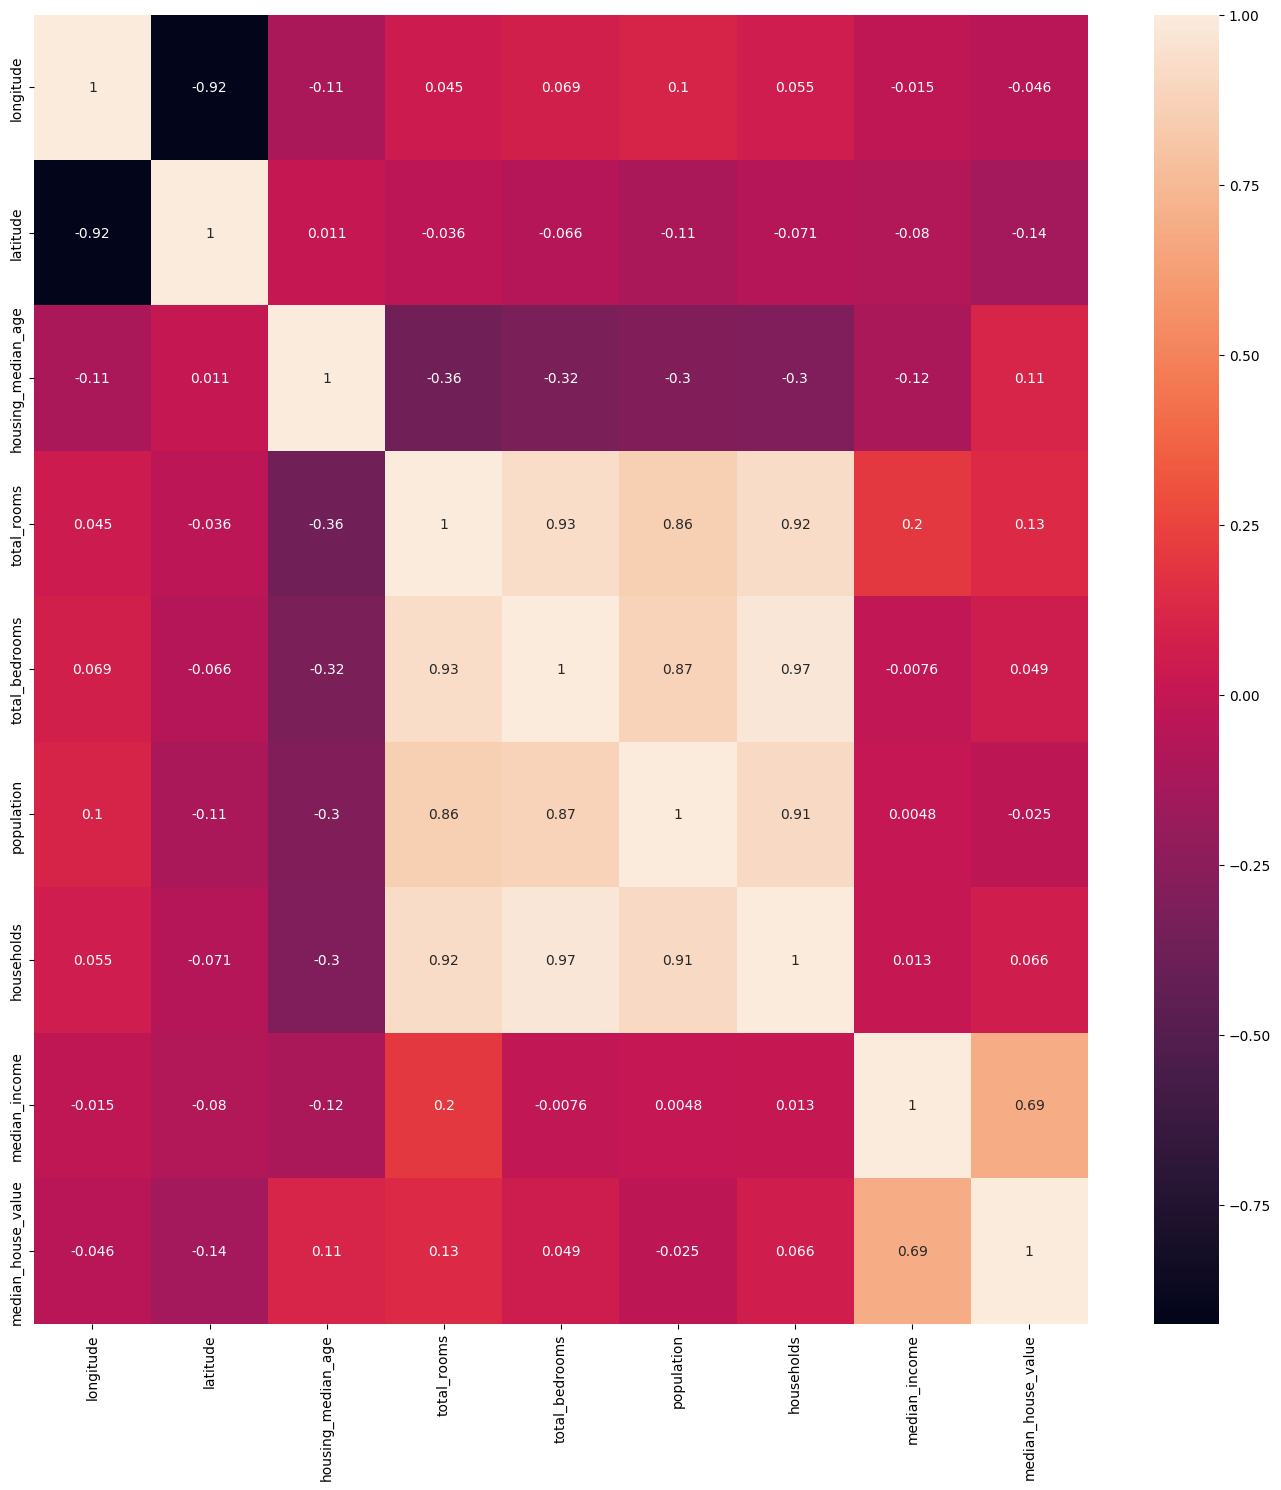

In [128]:
data_corr=data.corr()
fig, ax = plt.subplots(figsize=(17,17))
sns.heatmap(data_corr,annot=True,fmt='.2g')


In [129]:
## Select the X variables and the Y variable

X=data.iloc[:,0:8]
Y=data.iloc[:,8]

In [130]:
##Train, test and split the data

x_train, x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=32)

In [131]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1032,-120.80,38.51,23,1001,195.0,369,157,3.1250
10807,-117.93,33.65,35,2133,413.0,1473,402,4.4211
87,-122.27,37.81,10,875,348.0,546,330,0.7600
4395,-118.28,34.08,52,2465,773.0,2328,746,2.6178
19053,-121.69,38.16,33,1808,363.0,824,340,3.2937
...,...,...,...,...,...,...,...,...
19527,-120.96,37.64,41,1467,328.0,673,310,2.7917
20414,-118.85,34.18,11,5873,1455.0,3089,1365,3.5504
9526,-123.16,39.13,33,1320,303.0,1048,303,1.7813
9771,-121.40,36.38,39,2288,529.0,1449,410,3.3289


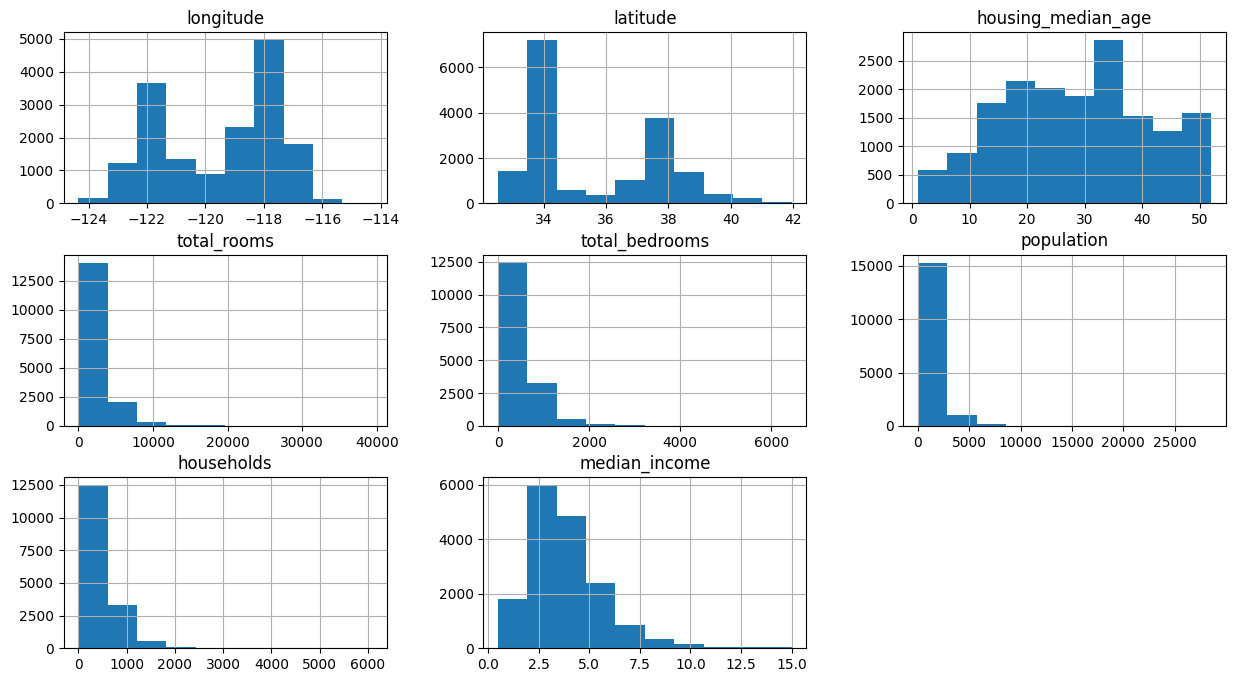

<Figure size 640x480 with 0 Axes>

In [132]:

x_train.hist(figsize=(15,8))
plt.show()
plt.tight_layout()

In [133]:
## Standard Scaler Avoid overfitting
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [134]:
## Linear Regression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [135]:
## Declare the prediction
pred_lin=lin_reg.predict(x_test)

In [136]:
## Create a data frame for predictions
pd.DataFrame({'Actual':y_test,'Predicted':pred_lin})

,Actual,Predicted
20038,52300,65141.525843
17684,87500,218579.550860
9720,253800,240012.870859
17295,500001,450210.498619
18736,98100,94758.595991
...,...,...
7573,118800,191249.769400
11436,289800,288595.070833
16564,327300,198605.800273
5083,100000,125736.488216


In [137]:
##Model evaluation
## MAE Mean absolute error
##MSE Mean Square Error
##RMSE Root main square error
##R^2 or R2 square 0 to 1


In [138]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_lin))
print('MSE:', metrics.mean_squared_error(y_test,pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred_lin)))
print('R2:', metrics.r2_score(y_test, pred_lin))

MAE: 51633.83129988814
MSE: 5184486228.111424
RMSE: 72003.37650493499
R2: 0.6208240355770936


In [139]:
## Polynomial regression

poly_reg=PolynomialFeatures(degree=2)

x_train_2=poly_reg.fit_transform(x_train)
x_test_2=poly_reg.transform(x_test)
mul_reg=LinearRegression()
mul_reg.fit(x_train_2,y_train)

LinearRegression()

In [140]:
##prediction

mul_pred=mul_reg.predict(x_test_2)
pd.DataFrame({'Actual': y_test,'Predicted': mul_pred})

,Actual,Predicted
20038,52300,64404.973816
17684,87500,195838.043251
9720,253800,237694.928398
17295,500001,516176.815725
18736,98100,117059.885143
...,...,...
7573,118800,178133.752749
11436,289800,299760.629302
16564,327300,189120.034216
5083,100000,128322.885637


In [141]:
##Measuring accuracy
print('MAE:', metrics.mean_absolute_error(y_test, mul_pred))
print('MSE:', metrics.mean_squared_error(y_test,mul_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,mul_pred)))
print('R2:', metrics.r2_score(y_test, mul_pred))

MAE: 46379.096163773545
MSE: 5998919951.921941
RMSE: 77452.6949300148
R2: 0.5612590798424375


In [142]:
##random forest regression
rf_reg=RandomForestRegressor(n_estimators=100,random_state=32)
rf_reg.fit(x_train,y_train)

RandomForestRegressor(random_state=32)

In [143]:
rf_reg_pred=rf_reg.predict(x_test)
pd.DataFrame({'Actual': y_test,'Predicted': rf_reg_pred})

,Actual,Predicted
20038,52300,57536.00
17684,87500,152221.00
9720,253800,250251.01
17295,500001,353806.22
18736,98100,116165.00
...,...,...
7573,118800,144323.00
11436,289800,295095.03
16564,327300,178038.00
5083,100000,110828.00


In [145]:
rf_reg.score(x_test,y_test)

0.8245940484914398

In [ ]:
##Measuring accuracy
print('MAE:', metrics.mean_absolute_error(y_test, rf_reg_pred))
print('MSE:', metrics.mean_squared_error(y_test,rf_reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,rf_reg_pred)))
print('R2:', metrics.r2_score(y_test, rf_reg_pred))

MAE: 31248.568551356588
MSE: 2398331712.0560975
RMSE: 48972.76500317393
R2: 0.8245940484914398


In [150]:
## Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

parameter_grid={"n_estimators":[3,10,30], "max_features":[2,4,6,8]}

grid_serach=GridSearchCV(rf_reg,parameter_grid,cv=5,scoring="neg_mean_squared_error"
                         ,return_train_score=True)

grid_serach.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=32),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [151]:
grid_serach.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=32)

In [152]:
best_rf_reg=grid_serach.best_estimator_

In [153]:
best_rf_reg.score(x_test,y_test)

0.8240480886694079